C:\Users\jeril\AppData\Local\Temp\ipykernel_17308\1233173953.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['GENDER_LABEL'] = filtered_df['GENDER'].map(gender_mapping)


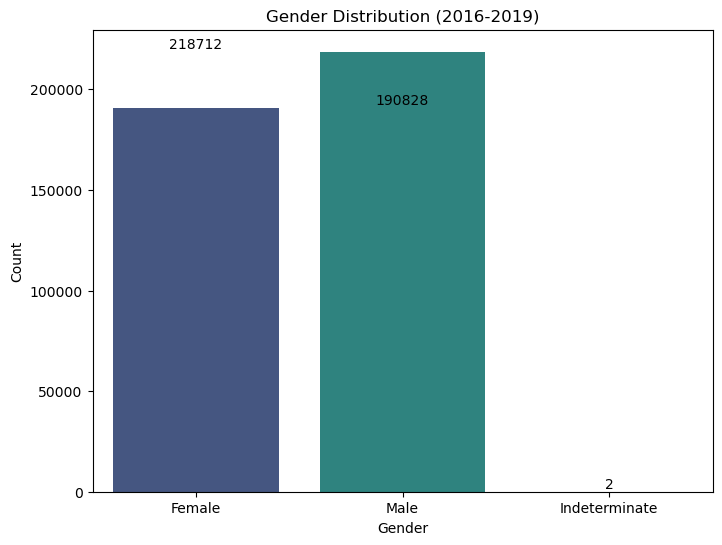

In [2]:
#BAR CHART
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('sim_av_patient.csv')

# Convert the 'VITALSTATUSDATE' column to datetime
df['VITALSTATUSDATE'] = pd.to_datetime(df['VITALSTATUSDATE'])

# Filter data for the date range 2016 to 2019
filtered_df = df[(df['VITALSTATUSDATE'] >= '2016-01-01') & (df['VITALSTATUSDATE'] <= '2019-12-31')]

# Check for duplicates in 'PATIENTID'
duplicates = filtered_df[filtered_df.duplicated('PATIENTID', keep=False)]

if not duplicates.empty:
    print("Duplicate PATIENTIDs found. Handling duplicates...")

    # Keep only the first occurrence of duplicates
    filtered_df = filtered_df.drop_duplicates('PATIENTID', keep='first')

# Map gender codes to labels
gender_mapping = {1: 'Male', 2: 'Female', 9: 'Indeterminate'}
filtered_df['GENDER_LABEL'] = filtered_df['GENDER'].map(gender_mapping)

# Arrange the data in ascending order of 'PATIENTID'
filtered_df = filtered_df.sort_values(by='PATIENTID')

# Plot the gender distribution with labels and counts
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER_LABEL', data=filtered_df, palette='viridis')

# Add labels and counts on top of the bars
for idx, count in enumerate(filtered_df['GENDER_LABEL'].value_counts()):
    plt.text(idx, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Gender Distribution (2016-2019)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


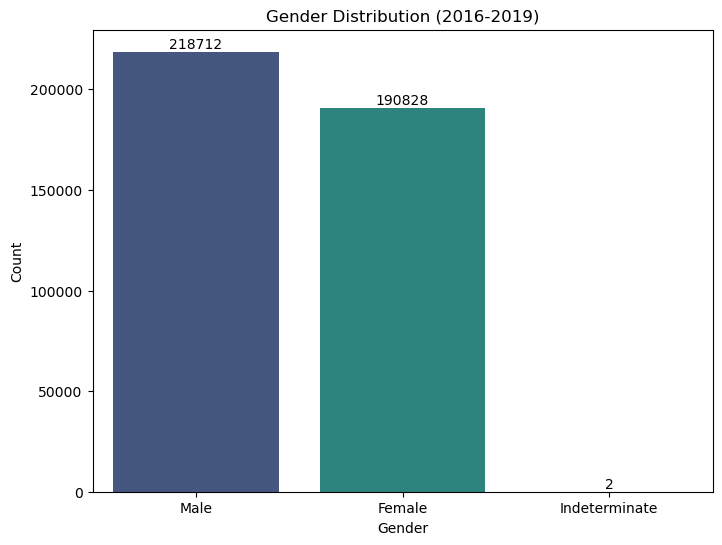

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('sim_av_patient.csv')

# Convert the 'VITALSTATUSDATE' column to datetime
df['VITALSTATUSDATE'] = pd.to_datetime(df['VITALSTATUSDATE'])

# Filter data for the date range 2016 to 2019
filtered_df = df[(df['VITALSTATUSDATE'] >= '2016-01-01') & (df['VITALSTATUSDATE'] <= '2019-12-31')]

# Check for duplicates in 'PATIENTID'
duplicates = filtered_df[filtered_df.duplicated('PATIENTID', keep=False)]

if not duplicates.empty:
    print("Duplicate PATIENTIDs found. Handling duplicates...")

    # Keep only the first occurrence of duplicates
    filtered_df = filtered_df.drop_duplicates('PATIENTID', keep='first')

# Arrange the data in ascending order of 'PATIENTID'
filtered_df = filtered_df.sort_values(by='PATIENTID')

# Count the number of males, females, and indeterminate
gender_counts = filtered_df['GENDER'].value_counts().sort_index()

# Map gender codes to labels
gender_mapping = {1: 'Male', 2: 'Female', 9: 'Indeterminate'}
gender_counts.index = gender_counts.index.map(gender_mapping)

# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Add labels on top of the bars
for idx, count in enumerate(gender_counts.values):
    plt.text(idx, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Gender Distribution (2016-2019)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
